In [2]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from yellowbrick.classifier import *
#import shap
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.naive_bayes import *
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import loguniform
from skopt import BayesSearchCV
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier 
from feature import *
from Modelling import *


In [3]:
data =  pd.read_excel('bank-full.xlsx')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [7]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Iterate through each column and apply label encoding
for column in data.columns:
    data[column] = label_encoder.fit_transform(data[column])

# Concatenate the label-encoded features with the target variable
data = pd.concat([data], axis=1)

data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,9,1,2,0,1741,0,0,0,16,9,975,2,0,0,3,1
45207,53,5,0,0,0,2639,0,0,0,16,9,456,1,0,0,3,1
45208,54,5,1,1,0,5455,0,0,0,16,9,1116,4,181,3,2,1
45209,39,1,1,1,0,1584,0,0,1,16,9,508,3,0,0,3,0


In [8]:
# separating the data & label
X = data.drop(columns = ['y'],axis=1)
y = data['y']

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:


# Initialize the CatBoostClassifier
catboost_model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, loss_function='Logloss', eval_metric='AUC', random_seed=42)

# Fit the model on the training data
catboost_model.fit(X_train, y_train, verbose=100)

# Make predictions on the testing data
y_pred = catboost_model.predict(X_test)
y_pred_proba = catboost_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')


0:	total: 156ms	remaining: 1m 17s
100:	total: 1.17s	remaining: 4.62s
200:	total: 2.11s	remaining: 3.14s
300:	total: 3s	remaining: 1.98s
400:	total: 3.9s	remaining: 964ms
499:	total: 4.78s	remaining: 0us
Accuracy: 0.91
ROC AUC: 0.94


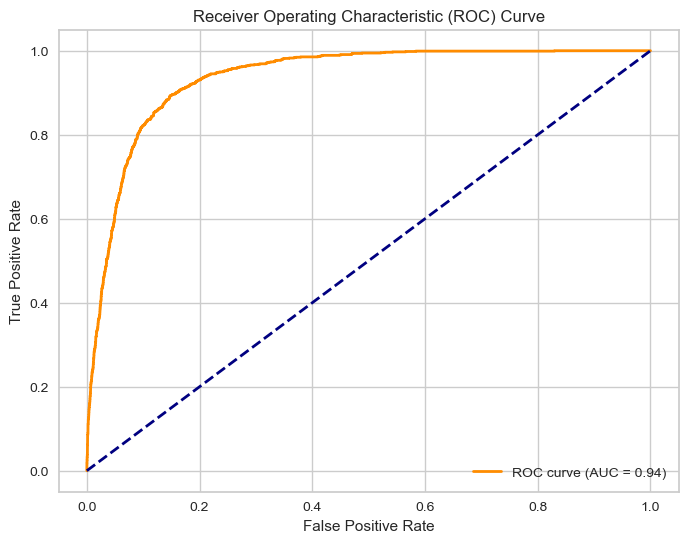

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7952
           1       0.66      0.49      0.56      1091

    accuracy                           0.91      9043
   macro avg       0.80      0.73      0.75      9043
weighted avg       0.90      0.91      0.90      9043



In [11]:

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
